In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import nltk
# from textblob import TextBlob
from bs4 import BeautifulSoup
import unicodedata
import gensim
import re
spacy_nlp = spacy.load('en')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set(style = 'darkgrid') # setting style of facetgrid in seaborn



In [71]:
# setting display options for dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [72]:
# loading the dataset from my github
data = pd.read_json('https://raw.githubusercontent.com/matsujju/All_Data_files/master/stackoverflow_scrapped/stackoverflow_scrapped_data.json', encoding = 'utf8')

In [73]:
data.shape

(222100, 4)

In [74]:
# There won't be any missing values as I scrapped the data myself but still good to check
print('Number of missing Questions:')
data['Text_of_quest'].isnull().sum()

Number of missing Questions:


0

In [75]:
data['Text_of_quest'] = [item.replace('...','') for item in data['Text_of_quest']]

In [76]:
data.drop(columns =['_type'] , inplace = True )

In [77]:
# All the functions needed to clean the text data for proper usage
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

def data_clean(text):
    text = text.lower()  # lowering of characters
    text = text.strip()  # removeing extra spaces before and after the sentence
    # text = TextBlob(text).correct() # spelling mistakes correction  (very slow) (maybe try directly on dataframe column)
    return text


# remove accented characters (Sómě Áccěntěd těxt)
def remove_accented_chars(text):
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
    )
    return text


def strip_html_tags(text):  # function for removing html tags
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


def remove_special_characters(text, remove_digits=False):  # function for removing punctuations , before using this remove any contractions(like "I'll" --> "I will") in text data
    pattern = r"[^a-zA-z0-9\s]" if not remove_digits else r"[^a-zA-z\s]"
    text = re.sub(pattern, " ", text)
    return text


# # custom way to remove punctuations of your choice from all of them (than regex one)
# puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
#  '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
#  '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
#  '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
#  '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

# def punctuation(x):  # before using this remove any contractions(like "I'll" --> "I will") in text data
#     x = str(x)
#     for punct in puncts:
#         if punct in x:
#             x = x.replace(punct, ' ')
#     return x


def remove_links_emojis(text):
    pattern = re.compile( "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")  # removing https:www.examples.com
    text = pattern.sub("", text)

    emoji = re.compile("["u"\U0001F600-\U0001FFFF"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251""]+",
        flags=re.UNICODE,
    )
    text = emoji.sub(r"", text)
    return text

def contractions(text):  # contraction of text i.e remove_apostrophes
    text = re.sub("ain't", "is not", str(text))
    text = re.sub("aren't", "are not", str(text))
    text = re.sub("can't", "cannot", str(text))
    text = re.sub("can't've", "cannot have", str(text))
    text = re.sub("'cause", "because", str(text))
    text = re.sub("could've", "could have", str(text))
    text = re.sub("couldn't", "could not", str(text))
    text = re.sub("couldn't've", "could not have", str(text))
    text = re.sub("didn't", "did not", str(text))
    text = re.sub("doesn't", "does not", str(text))
    text = re.sub("don't", "do not", str(text))
    text = re.sub("hadn't", "had not", str(text))
    text = re.sub("hadn't've", "had not have", str(text))
    text = re.sub("hasn't", "has not", str(text))
    text = re.sub("haven't", "have not", str(text))
    text = re.sub("he'd", "he would", str(text))
    text = re.sub("he'd've", "he would have", str(text))
    text = re.sub("he'll", "he will", str(text))
    text = re.sub("he'll've", "he he will have", str(text))
    text = re.sub("he's", "he is", str(text))
    text = re.sub("how'd", "how did", str(text))
    text = re.sub("how'd'y", "how do you", str(text))
    text = re.sub("how'll", "how will", str(text))
    text = re.sub("how's", "how is", str(text))
    text = re.sub("I'd", "I would", str(text))
    text = re.sub("I'd've", "I would have", str(text))
    text = re.sub("I'll", "I will", str(text))
    text = re.sub("I'll've", "I will have", str(text))
    text = re.sub("I'm", "I am", str(text))
    text = re.sub("I've", "I have", str(text))
    text = re.sub("i'd", "i would", str(text))
    text = re.sub("i'd've", "i would have", str(text))
    text = re.sub("i'll", "i will", str(text))
    text = re.sub("i'll've", "i will have", str(text))
    text = re.sub("i'm", "i am", str(text))
    text = re.sub("i've", "i have", str(text))
    text = re.sub("isn't", "is not", str(text))
    text = re.sub("it'd", "it would", str(text))
    text = re.sub("it'd've", "it would have", str(text))
    text = re.sub("it'll", "it will", str(text))
    text = re.sub("it'll've", "it will have", str(text))
    text = re.sub("it's", "it is", str(text))
    text = re.sub("let's", "let us", str(text))
    text = re.sub("ma'am", "madam", str(text))
    text = re.sub("mayn't", "may not", str(text))
    text = re.sub("might've", "might have", str(text))
    text = re.sub("mightn't", "might not", str(text))
    text = re.sub("mightn't've", "might not have", str(text))
    text = re.sub("must've", "must have", str(text))
    text = re.sub("mustn't", "must not", str(text))
    text = re.sub("mustn't've", "must not have", str(text))
    text = re.sub("needn't", "need not", str(text))
    text = re.sub("needn't've", "need not have", str(text))
    text = re.sub("o'clock", "of the clock", str(text))
    text = re.sub("oughtn't", "ought not", str(text))
    text = re.sub("oughtn't've", "ought not have", str(text))
    text = re.sub("shan't", "shall not", str(text))
    text = re.sub("sha'n't", "shall not", str(text))
    text = re.sub("shan't've", "shall not have", str(text))
    text = re.sub("she'd", "she would", str(text))
    text = re.sub("she'd've", "she would have", str(text))
    text = re.sub("she'll", "she will", str(text))
    text = re.sub("she'll've", "she will have", str(text))
    text = re.sub("she's", "she is", str(text))
    text = re.sub("should've", "should have", str(text))
    text = re.sub("shouldn't", "should not", str(text))
    text = re.sub("shouldn't've", "should not have", str(text))
    text = re.sub("so've", "so have", str(text))
    text = re.sub("so's", "so as", str(text))
    text = re.sub("that'd", "that would", str(text))
    text = re.sub("that'd've", "that would have", str(text))
    text = re.sub("that's", "that is", str(text))
    text = re.sub("there'd", "there would", str(text))
    text = re.sub("there'd've", "there would have", str(text))
    text = re.sub("there's", "there is", str(text))
    text = re.sub("they'd", "they would", str(text))
    text = re.sub("they'd've", "they would have", str(text))
    text = re.sub("they'll", "they will", str(text))
    text = re.sub("they'll've", "they will have", str(text))
    text = re.sub("they're", "they are", str(text))
    text = re.sub("they've", "they have", str(text))
    text = re.sub("to've", "to have", str(text))
    text = re.sub("wasn't", "was not", str(text))
    text = re.sub("we'd", "we would", str(text))
    text = re.sub("we'd've", "we would have", str(text))
    text = re.sub("we'll", "we will", str(text))
    text = re.sub("we'll've", "we will have", str(text))
    text = re.sub("we're", "we are", str(text))
    text = re.sub("we've", "we have", str(text))
    text = re.sub("weren't", "were not", str(text))
    text = re.sub("what'll", "what will", str(text))
    text = re.sub("what'll've", "what will have", str(text))
    text = re.sub("what're", "what are", str(text))
    text = re.sub("what's", "what is", str(text))
    text = re.sub("what've", "what have", str(text))
    text = re.sub("when's", "when is", str(text))
    text = re.sub("when've", "when have", str(text))
    text = re.sub("where'd", "where did", str(text))
    text = re.sub("where's", "where is", str(text))
    text = re.sub("where've", "where have", str(text))
    text = re.sub("who'll", "who will", str(text))
    text = re.sub("who'll've", "who will have", str(text))
    text = re.sub("who's", "who is", str(text))
    text = re.sub("who've", "who have", str(text))
    text = re.sub("why's", "why is", str(text))
    text = re.sub("why've", "why have", str(text))
    text = re.sub("will've", "will have", str(text))
    text = re.sub("won't", "will not", str(text))
    text = re.sub("won't've", "will not have", str(text))
    text = re.sub("would've", "would have", str(text))
    text = re.sub("wouldn't", "would not", str(text))
    text = re.sub("wouldn't've", "would not have", str(text))
    text = re.sub("y'all", "you all", str(text))
    text = re.sub("y'all'd", "you all would", str(text))
    text = re.sub("y'all'd've", "you all would have", str(text))
    text = re.sub("y'all're", "you all are", str(text))
    text = re.sub("y'all've", "you all have", str(text))
    text = re.sub("you'd", "you would", str(text))
    text = re.sub("you'd've", "you would have", str(text))
    text = re.sub("you'll", "you will", str(text))
    text = re.sub("you'll've", "you will have", str(text))
    text = re.sub("you're", "you are", str(text))
    text = re.sub("you've", "you have", str(text))
    return text


# document = document.replace(‘…’, ‘’) # small nuances
# document = document.replace(‘Mr.’, ‘Mr’).replace(‘Mrs.’, ‘Mrs’) # small nuances to look for


def remove_hashtags(text):
    for item in text.split():
        if item.startswith("#"):
            text = text.append(item)
    return text


def lemmatize_text(text):  # function for lemmetization of text
    text = spacy_nlp(text)
    text = str( " ".join([word.lemma_ if word.lemma_ != "-PRON-" else word.text for word in text]))
    return text

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [78]:
# function to call above function in one go
def preprocess(text, raw_data = True , 
               contracted_text = True, 
               accented_chars = True,
               want_lemmatization = True, link_emoji = True,
               html_tags = True, 
               special_characters = True,
               hashtags = False,remove_digits = True,
               stop_words = True):
    
# cleaned data (lower & strip whitespaces & spelling mistake)
    if raw_data:
        text = data_clean(text)
    #strip html
    if html_tags:
        text = strip_html_tags(text)
    # accented char removal
    if accented_chars:
        text = remove_accented_chars(text)
    # hashtags
    if hashtags:
        text = remove_hashtags(text)
    # exapand contraction
    if contracted_text:
        text = contractions(text)
    if stop_words:
        text = remove_stopwords(text)
    # lemmetization
    if want_lemmatization:
        text = lemmatize_text(text)
    # punctuations and digits
    if special_characters:
        text = remove_special_characters(text,remove_digits = remove_digits)

    # remove extra whitespace
    text = re.sub(' +', ' ', text)

    
    
    return text

In [80]:
# Testing my custom preprocessing functions
text = 'think this #90 may be an issue in scikit. C++ cross_val_score ultimately makes a call to the score function for whatever estimator is passed to it. Typically, score (e.g. in KMeans) returns a float. And when a KMeans estimator is passed to cross_val_score, all is well:'
preprocess(text, remove_digits = False)

'think 90 may issue scikit c cross_val_score ultimately make call score function whatever estimator pass it typically score e g kmeans return float kmeans estimator pass cross_val_score well '

In [81]:
data.columns

Index(['Text_of_quest', 'Ques', 'Tags'], dtype='object')

In [82]:
data['full_text'] = data['Ques']+' '+data['Text_of_quest']

In [83]:
data["cleaned_text"] = [preprocess(item ,html_tags =False, remove_digits = False) for item in data["full_text"]]

In [84]:
data.sample(2)

,Text_of_quest,Ques,Tags,full_text,cleaned_text
22811,"I am new to C and have a case where I want to read in a simple text file with one word per row and I want to save this into an array. However, I want to declare a double pointer in function main and",How to allocate memory of triple pointer in a C function,"[c, pointers, malloc]","How to allocate memory of triple pointer in a C function I am new to C and have a case where I want to read in a simple text file with one word per row and I want to save this into an array. However, I want to declare a double pointer in function main and",allocate memory triple pointer c function new c case want read simple text file one word per row want save array however want declare double pointer function main
128499,"I installed react-navigation by this command: npm install react-navigation After that, i tried to install its dependencies npm install react-native-reanimated react-native-gesture-handler react-",Problem with installing react-navigation version4,"[reactjs, react-native, installation, react-navigation]","Problem with installing react-navigation version4 I installed react-navigation by this command: npm install react-navigation After that, i tried to install its dependencies npm install react-native-reanimated react-native-gesture-handler react-",problem instal react navigation version4 instal react navigation command npm install react navigation try install dependency npm install react native reanimate react native gesture handler react


In [85]:
data.drop(columns = ['Text_of_quest','Ques','full_text'], inplace= True)

In [90]:
print(f'There are {len(pd.DataFrame(data.Tags.values.tolist()).stack().value_counts())} number of Tags present in the data')

There are 25487 number of Tags present in the data


In [91]:
count = pd.DataFrame(data.Tags.values.tolist()).stack().value_counts()

#### These are too many labels and if build models for these it will be huge in terms of computation as well as time to train it. So we will reduce it down to as less as possible where we don't lose much Questions.

In [92]:
# this number(250) came with lots of hit and trial, without losing much Questions
count[count>250][:5] 

python        29339
javascript    22633
java          15007
c#            11306
android       10493
dtype: int64

In [93]:
filtered = count[count>250]

In [94]:
filtered = filtered.index.tolist()

In [95]:
# remove the tags which are not frequent (i.e not found more than 250 in all questions)
data['filtered_tags'] = [[item for item in l if item in set(filtered)] for l in data['Tags']]

In [96]:
data.shape

(222100, 3)

In [97]:
data['length'] = [len(item) for item in data['Tags']]

In [27]:
# data['tags'] = [','.join(map(str,item))for item in data['Tags']]

In [98]:
data.head()

,Tags,cleaned_text,filtered_tags,length
0,"[python, windows, pip, pygame, pycharm]",matter pip version instal specific python version read round still stick upgrade python 3 7 x python 3 8 1 windows 10 go cmd prompt check pip installed module,"[python, windows, pip, pygame, pycharm]",5
1,"[converters, dxf, dwg]",convert dwg dxf node php jave etc convert dwg file dxf node js python java i already try ogr2ogr success thank advance,[],3
2,"[tensorflow, keras-2]",keras use tensor size use dynamic input none none 3 dummy model like tensorflow keras layers import input conv2d conv2dtranspose cropping2d activation tensorflow keras models import model tensorflow kera import,[tensorflow],2
3,"[python, regex, nlp]",match text base string list extract subsection python try generate structure earning call text look like follow sample operator lady gentleman thank stand by welcome xyz fourth quarter,"[python, regex, nlp]",3
4,"[sql, join, dynamic, logic, case]",sql dynamically join table various column first time posting use case want join sale datum master agreement table determine applicable fee transactional level hard part agreement,"[sql, join]",5


In [99]:
df2 = pd.DataFrame(data.Tags.values.tolist()).stack().value_counts().to_frame().reset_index()
df2.columns = ['tags','counts']

In [100]:
df2.head()

,tags,counts
0,python,29339
1,javascript,22633
2,java,15007
3,c#,11306
4,android,10493


In [ ]:
# This is saved and uploaded to my github for modelling
# data.to_json('cleaned_stackoverflow_questions.json',orient = 'records',lines=True)

In [101]:
# Number of Questions in each category of Tags
import plotly.express as px
plt.figure(figsize = (35,10))
fig = px.line(df2,y = df2['counts'].values[:100],x = df2.tags[:100],labels={
                     "y": "# of Occurrences",
                     "x": "Tags",
                     
                 },)
fig.update_layout( 
        title = 'Number of comments per labels',
        hovermode="y",  # it shows the value along x-axis ticks on hovering in plot
        hoverdistance=30000,  # distance above/right of the plot till where the user can hover
        spikedistance=30000,  # length of spike according to data max value
        xaxis=dict(
            tickmode="linear",  # how tick value will change
            tick0=1,  # starting tick in plot along respective axis
            dtick=1,  # gap between each ticks
            visible=True,
            showgrid=False,
            showspikes=True,  # Show spike line for X-axis
            # Format spike
            spikethickness=2,
            spikedash="dot",
            spikecolor="#999999",
            spikemode="across",
            linecolor="#737373",
            tickangle = 90,),
        yaxis = dict(showspikes=True,
                     spikethickness=2,
                     spikedash="dot",
                     spikecolor="#999999",
                     spikemode="across",
                     linecolor="#737373",))
fig.show()

<Figure size 2520x720 with 0 Axes>

In [102]:
max(data['length'])

5

In [103]:
# How many Questions have multi labels?
fig = px.bar(data['length'].value_counts(),title = 'Multiple Tags per Question', labels=
            {'index':'# of Tags','value' :'# of Occurrences'})
fig.layout.update(showlegend = False)
fig.show()

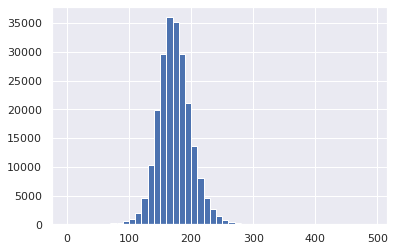

In [104]:
#distribution of the number of words in question texts
lens = data.cleaned_text.str.len()
lens.hist(bins = np.arange(0,500,10))

Most of the Question text length are within 150 characters, with some outliers up to 250 characters long.

In [ ]:
data['tags'] = [','.join(map(str,item))for item in data['Tags']]

In [105]:
text = " ".join(item for item in data.cleaned_text)
tags = " ".join(item for item in data.tags)
print ("There are {} words in the combination of all Questions.".format(len(text)))
print ("There are {} words in the combination of all tags.".format(len(tags)))

AttributeError: 'DataFrame' object has no attribute 'tags'

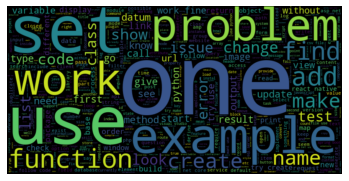

In [69]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

text_wordcloud = WordCloud(max_words=10000, height = 400, width = 800).generate(text)  # since it is cleaned text so we need not to worry about stopwords
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

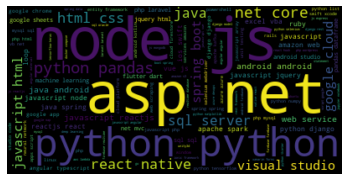

In [68]:
tags_wordcloud = WordCloud(max_words=10000).generate(tags)  # since it is cleaned text so we need not to worry about stopwords
plt.imshow(tags_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### This problem is Multi label Classification as for every text there will be more than one label. 
1. [For more details visit sklearn-multi-label](http://scikit.ml/api/skmultilearn.html#module-skmultilearn.ensemble)
2. [Model Evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)
3. [sklearn multi label model](https://scikit-learn.org/stable/modules/multiclass.html#multilabel-classification-format)
4. [Detailed Article (Analytics Vidya)](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/)
   - Approaches:
       - Problem Transformation :
           * Three different ways:
               - Binary Relevance : treats each label as a separate single class classification problem. 
               - Classifier Chains : first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.  
               - Label Powerset : transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data. 
       - Adapted Algorithm : adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems. 
       - Ensemble approaches : ensembling classification functions, which we can use for obtaining better results. 

### **We are going to build model on top of our cleaned and processed data in next notebook. So look for that.**